<a href="https://colab.research.google.com/github/Npps1997/AAPL-Data-Storage-in-mysql-Database-With-AWS./blob/main/Natwest_Assignment_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## By NEERAJ KUMAR PAIKRA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the log data and log templates
log_data = pd.read_csv('HealthApp_2k.log_structured.csv')
log_templates = pd.read_csv('HealthApp_2k.log_templates.csv')

In [3]:
#Exploring the data
log_data.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [4]:
log_data.head(10)

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data
5,6,20171223-22:15:29:635,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...
6,7,20171223-22:15:29:636,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038440000##7007##...,E58,setTodayTotalDetailSteps=<*>
7,8,20171223-22:15:29:636,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
8,9,20171223-22:15:29:645,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>
9,10,20171223-22:15:29:648,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>


In [5]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [6]:
log_templates.head(10)

,EventId,EventTemplate
0,E1,Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>...
1,E2,"bulkSaveDetailHiHealthData() size = <*>,totalT..."
2,E3,calculateAltitudeWithCache totalAltitude=<*>
3,E4,calculateCaloriesWithCache totalCalories=<*>
4,E5,"checkCurrentDay a new day comes , reset basicS..."
5,E6,"checkFirstSyncByType no such data in db ,type ..."
6,E7,checkInsertStatus stepStatSum or calorieStatSu...
7,E8,checkInsertStatus stepSum or calorieSum is enough
8,E9,clear()
9,E10,closeNotification...


In [7]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [8]:
log_data = pd.merge(log_data, log_templates, on='EventId', how='left')

In [9]:
log_data.nunique()

LineId             2000
Time               1711
Component            20
Pid                   1
Content            1179
EventId              75
EventTemplate_x      75
EventTemplate_y      75
dtype: int64

In [10]:
log_data['Time'] = pd.to_datetime(log_data['Time'], format='%Y%m%d-%H:%M:%S:%f')

In [11]:
# date and time information
log_data['Date'] = log_data['Time'].dt.date
log_data['Hour'] = log_data['Time'].dt.hour
log_data['Date'] = pd.to_datetime(log_data['Date'])

In [12]:
log_data.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate_x,EventTemplate_y,Date,Hour
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,onStandStepChanged <*>,2017-12-23,22
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,onExtend:<*> <*> <*> <*>,2017-12-23,22
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,processHandleBroadcastAction action:android.in...,2017-12-23,22
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,flush sensor data,2017-12-23,22


### Workout Time Distribution

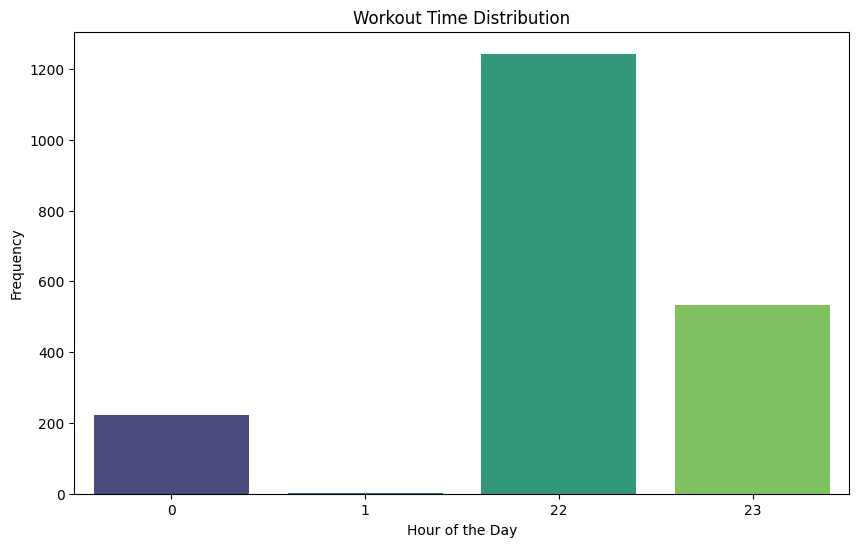

In [13]:
# Workout Time Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=log_data, palette='viridis')
plt.title('Workout Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

### Hourly Trends of Events

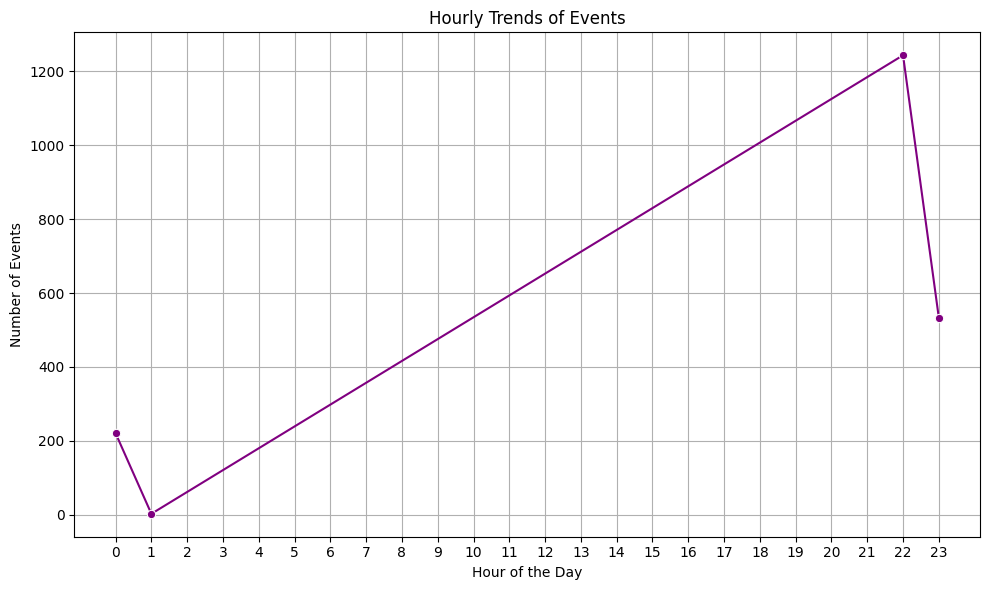

In [14]:
# Group by hour to count events
hourly_event_counts = log_data.groupby('Hour').size().reset_index(name='EventCount')

# Plotting Hourly Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='EventCount', data=hourly_event_counts, marker='o', color='purple')
plt.title('Hourly Trends of Events')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 10 Events

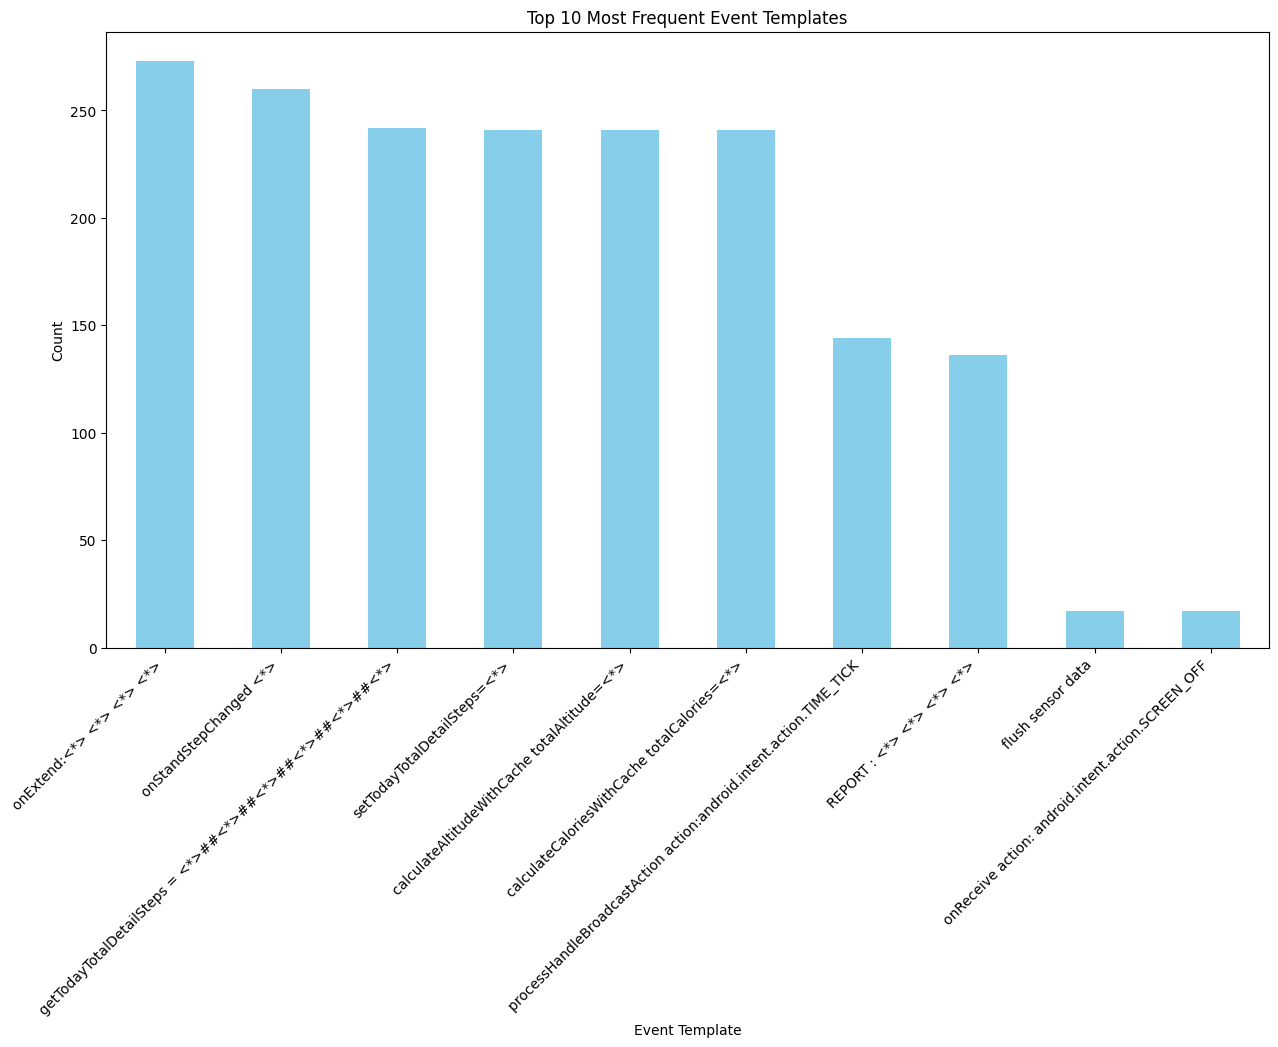

In [15]:
# Explore the distribution of event templates
plt.figure(figsize=(15, 8))
top_event = log_data['EventTemplate_x'].value_counts().head(10)
top_event.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Event Templates')
plt.xlabel('Event Template')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
top_event

onExtend:<*> <*> <*> <*>                                               273
onStandStepChanged <*>                                                 260
getTodayTotalDetailSteps = <*>##<*>##<*>##<*>##<*>##<*>                242
setTodayTotalDetailSteps=<*>                                           241
calculateAltitudeWithCache totalAltitude=<*>                           241
calculateCaloriesWithCache totalCalories=<*>                           241
processHandleBroadcastAction action:android.intent.action.TIME_TICK    144
REPORT : <*> <*> <*> <*>                                               136
flush sensor data                                                       17
onReceive action: android.intent.action.SCREEN_OFF                      17
Name: EventTemplate_x, dtype: int64

### Daily Steps Trends

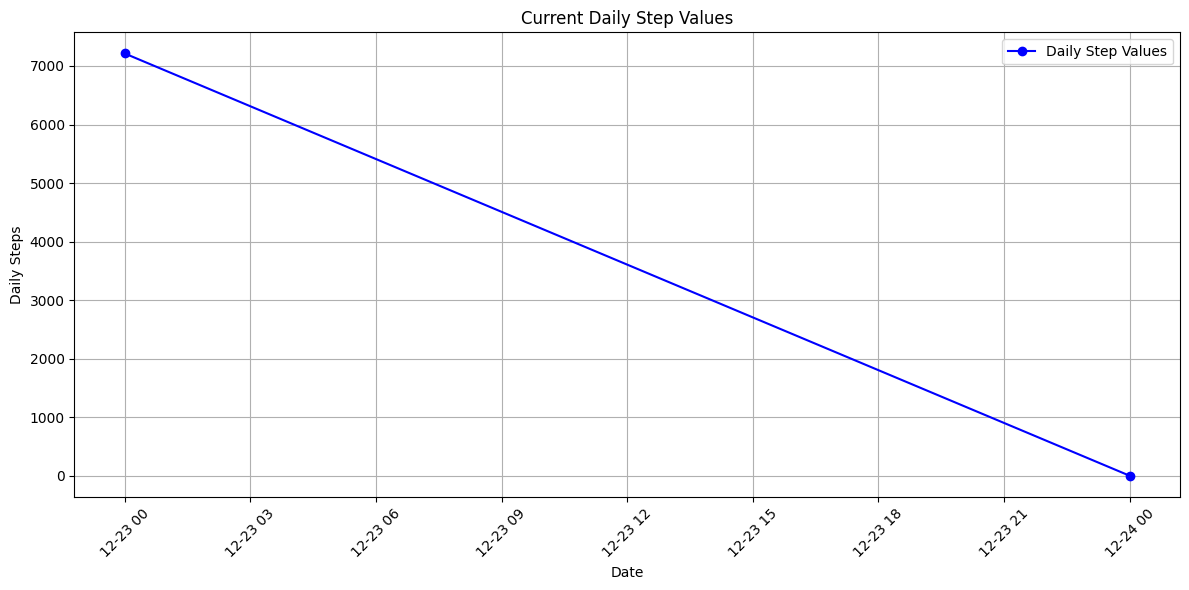

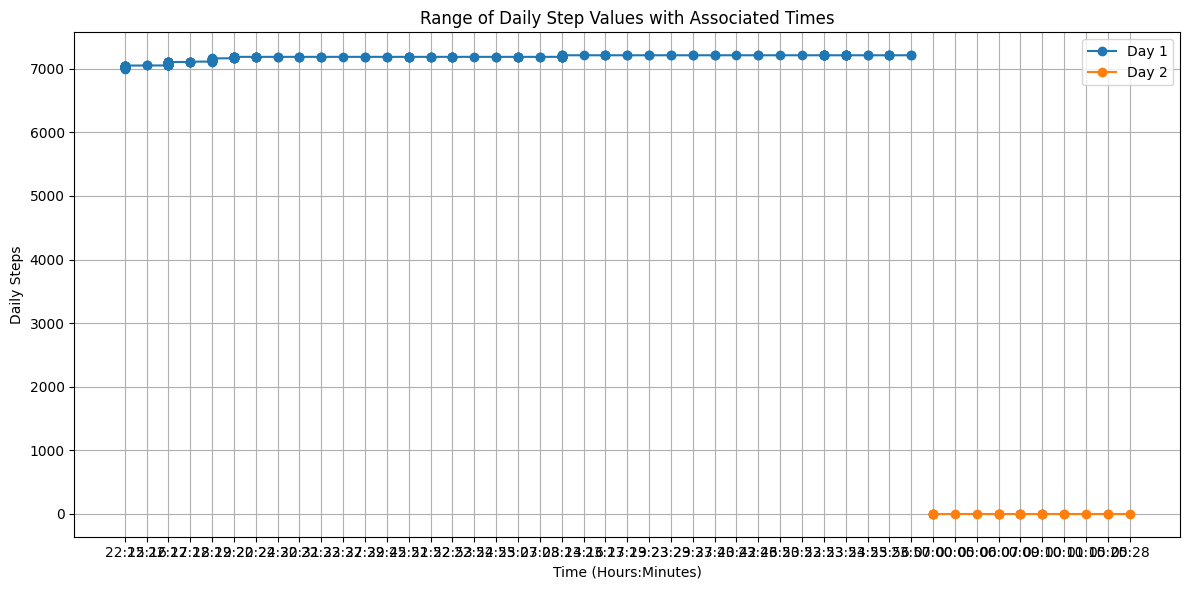

In [17]:
# Filtering rows with 'getTodayTotalDetailSteps' events
event_rows = log_data[log_data['Content'].str.contains('getTodayTotalDetailSteps')]

# daily steps from 'getTodayTotalDetailSteps' events
log_data['DailySteps'] = log_data['Content'].apply(lambda x: int(x.split('=')[1].split('##')[1]) if 'getTodayTotalDetailSteps' in x else None)

# rows with non-null values in the 'DailySteps' column
daily_steps_df = log_data[log_data['DailySteps'].notna()]

# Select the last value for total steps walked in a day
daily_step_values = daily_steps_df.groupby('Date')['DailySteps'].last()

# For getting the list of steps per day
daily_range_step_values = daily_steps_df.groupby('Date')['DailySteps'].apply(list).reset_index()

# Extract hours and minutes from the 'Time' column
log_data['TimeHrsMin'] = log_data['Time'].dt.strftime('%H:%M')

# Filter rows with 'getTodayTotalDetailSteps' events
event_rows = log_data[log_data['Content'].str.contains('getTodayTotalDetailSteps')]

# Group times by date
event_times = event_rows.groupby('Date')['TimeHrsMin'].apply(list).reset_index()

# Adding the event_times in the daily_range_step_values
daily_range_step_values['TimeHrsMin'] = event_times['TimeHrsMin']

# Rectifying the first two values of the previous day present in the new day data
daily_range_step_values['DailySteps'].iloc[1][0] = 0.0
daily_range_step_values['DailySteps'].iloc[1][1] = 0.0

# Plotting Current Daily Step Values
plt.figure(figsize=(12, 6))
plt.plot(daily_step_values.index, daily_step_values.values, marker='o', linestyle='-', color='b', label='Daily Step Values')
plt.title('Current Daily Step Values')
plt.xlabel('Date')
plt.ylabel('Daily Steps')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Range of Daily Step Values with Associated Times
plt.figure(figsize=(12, 6))
for i, row in daily_range_step_values.iterrows():
    plt.plot(row['TimeHrsMin'], row['DailySteps'], marker='o', linestyle='-', label=f'Day {i + 1}')

plt.title('Range of Daily Step Values with Associated Times')
plt.xlabel('Time (Hours:Minutes)')
plt.ylabel('Daily Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Daily Calorie burnt trends

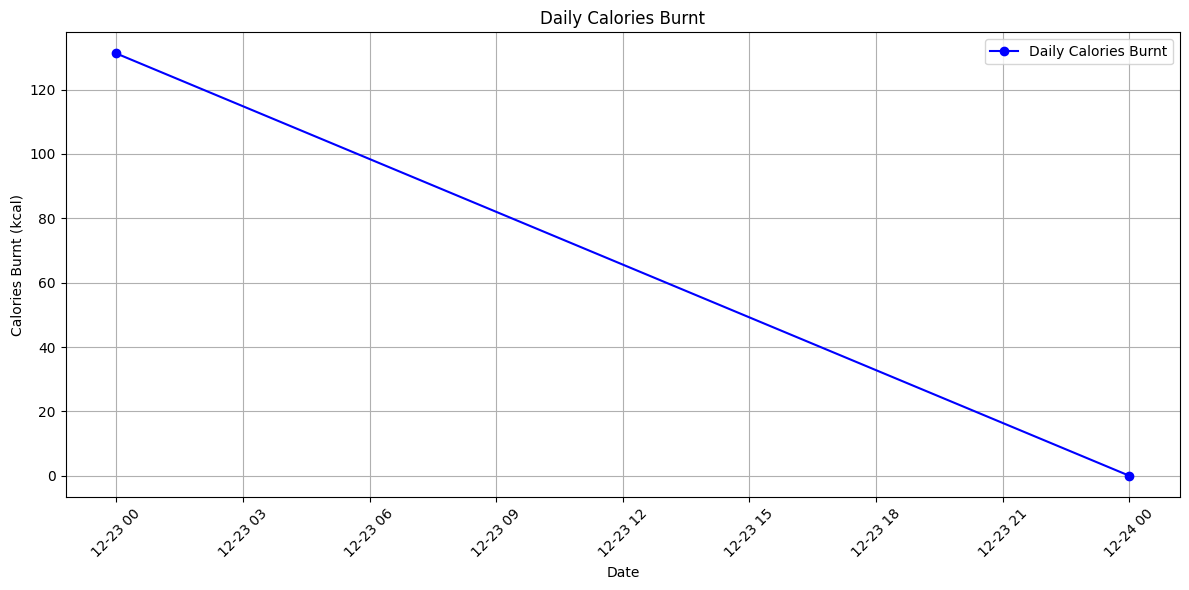

In [18]:
# Extract last calorie burnt value from 'calculateCaloriesWithCache' events
log_data['CaloriesBurnt'] = log_data['Content'].apply(lambda x: float(x.split('=')[-1]) if 'calculateCaloriesWithCache' in x else None)

# rows with non-null values in the 'CaloriesBurnt' column
daily_calories_df = log_data[log_data['CaloriesBurnt'].notna()]

# Select the last value for total calories burnt in a day
user_daily_calories_burnt = daily_calories_df.groupby('Date')['CaloriesBurnt'].last().to_frame().reset_index()

# Convert calories to kilocalories
user_daily_calories_burnt['CaloriesBurnt'] /= 1000.0

# Plotting Daily Calories Burnt
plt.figure(figsize=(12, 6))
plt.plot(user_daily_calories_burnt['Date'], user_daily_calories_burnt['CaloriesBurnt'], marker='o', linestyle='-', color='b', label='Daily Calories Burnt')
plt.title('Daily Calories Burnt')
plt.xlabel('Date')
plt.ylabel('Calories Burnt (kcal)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
log_data.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate_x,EventTemplate_y,Date,Hour,DailySteps,TimeHrsMin,CaloriesBurnt
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,onStandStepChanged <*>,2017-12-23,22,NaN,22:15,NaN
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,onExtend:<*> <*> <*> <*>,2017-12-23,22,NaN,22:15,NaN
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22,NaN,22:15,NaN
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,processHandleBroadcastAction action:android.in...,2017-12-23,22,NaN,22:15,NaN
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,flush sensor data,2017-12-23,22,NaN,22:15,NaN


### Active Days

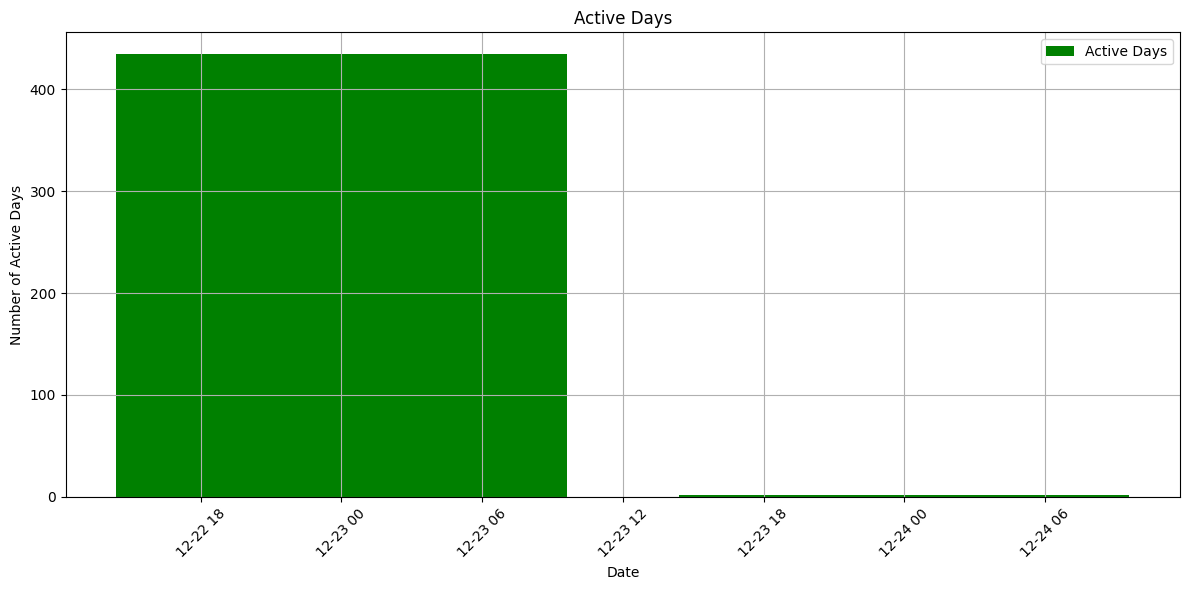

In [20]:
# Define thresholds for steps and calories to consider a day as active
steps_threshold = 5000
calories_threshold = 200

# Filter rows where steps or calories exceed the threshold
active_days_df = log_data[(log_data['DailySteps'] > steps_threshold) | (log_data['CaloriesBurnt'] > calories_threshold)]

# Group by date to count active days
active_days_count = active_days_df.groupby('Date').size().reset_index(name='ActiveDaysCount')

# Plotting Active Days
plt.figure(figsize=(12, 6))
plt.bar(active_days_count['Date'], active_days_count['ActiveDaysCount'], color='green', label='Active Days')
plt.title('Active Days')
plt.xlabel('Date')
plt.ylabel('Number of Active Days')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Active days by week of day

<ipython-input-21-9297f7aefca2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_days_df['DayOfWeek'] = active_days_df['Date'].dt.day_name()


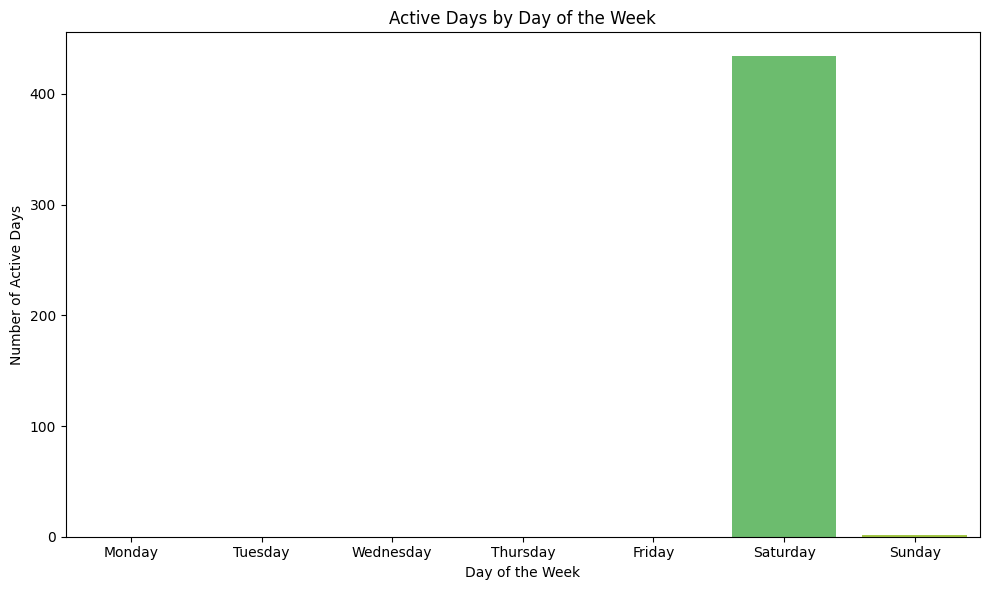

In [21]:
steps_threshold = 5000  # Adjust as needed
calories_threshold = 200  # Adjust as needed

# Filter rows where steps or calories exceed the threshold
active_days_df = log_data[(log_data['DailySteps'] > steps_threshold) | (log_data['CaloriesBurnt'] > calories_threshold)]

# Extract the day of the week from the 'Date' column
active_days_df['DayOfWeek'] = active_days_df['Date'].dt.day_name()

# Group by day of the week to count active days
active_days_by_day = active_days_df.groupby('DayOfWeek').size().reset_index(name='ActiveDaysCount')

# Order days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting Active Days by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='ActiveDaysCount', data=active_days_by_day, order=days_order, palette='viridis')
plt.title('Active Days by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Active Days')
plt.tight_layout()
plt.show()

### Day wise Steps and Calories

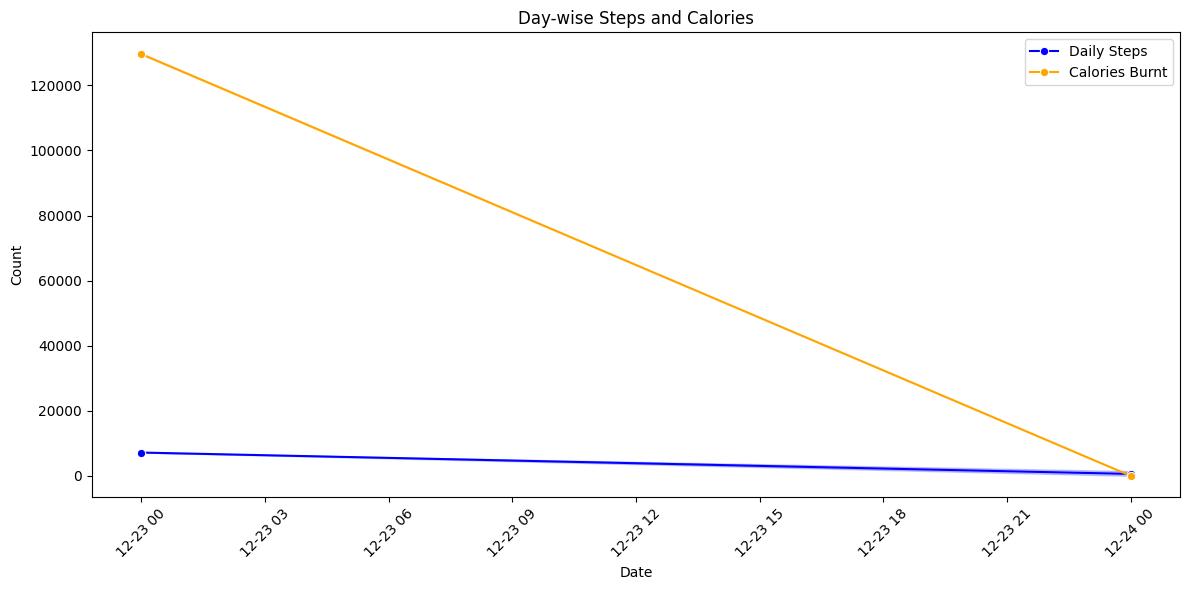

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailySteps', data=log_data, marker='o', label='Daily Steps', color='blue')
sns.lineplot(x='Date', y='CaloriesBurnt', data=log_data, marker='o', label='Calories Burnt', color='orange')
plt.title('Day-wise Steps and Calories')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Correlation Analysis

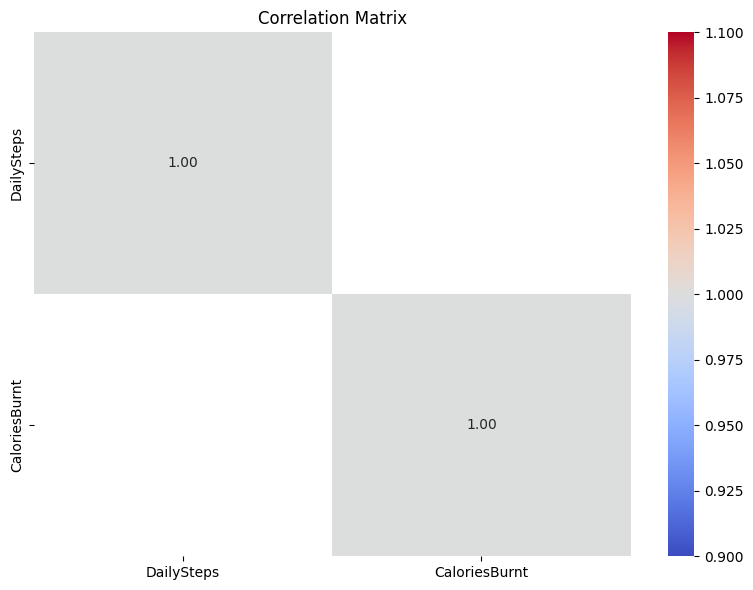

In [23]:
# Correlation Analysis
correlation_matrix = log_data[['DailySteps', 'CaloriesBurnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()